In [1]:
#llc create for OrgEx
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [42]:
#df = pd.read_csv('JanJournal_OE.tsv', sep='\t')
#df = pd.read_csv('FebJournal_OE.tsv', sep='\t')
df = pd.read_csv('MarJournal_OE.tsv', sep='\t')

In [43]:
df['num_addresses'] = df['TO'].str.split(',').str.len()

In [44]:
len(df)

4811747

drop all messages with a recipient count more than 12

In [45]:
df = df[df['num_addresses'] <= 12]

In [46]:
df.drop('num_addresses', axis=1, inplace=True)

In [47]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [48]:
df.dropna(subset=['FROM', 'TO'], inplace=True)

In [49]:
len(df)

4587586

drop all messagesoutside org

In [50]:
# Filter out addresses that do not end with "@0.test"
df['FROM'] = df['FROM'][df['FROM'].str.endswith('@0.test')]

In [51]:
df['TO'] = df['TO'].apply(lambda x: ','.join([addr for addr in x.split(',') if addr.endswith('@0.test')]))

In [52]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [53]:
df.dropna(subset=['FROM', 'TO'], inplace=True)

In [54]:
len(df)

1870401

In [55]:
df = df[['FROM','TO','DATETIME','DIRECTION']].copy()

In [56]:
df.rename(columns={'FROM': 'From','TO':'To','DATETIME':'DateTime','DIRECTION':'Direction'}, inplace=True)

In [57]:
#export
#df.to_csv('pfizer_Jan_20230613.llc',index=False,sep='\t')
#df.to_csv('pfizer_Feb_20230613.llc',index=False,sep='\t')
df.to_csv('pfizer_Mar_20230613.llc',index=False,sep='\t')

In [58]:
#now graph it
def epoch_to_datetime(epoch_time):
    import datetime
    return datetime.datetime.fromtimestamp(epoch_time)

In [59]:
df['realtime'] = df['DateTime'].apply(epoch_to_datetime)

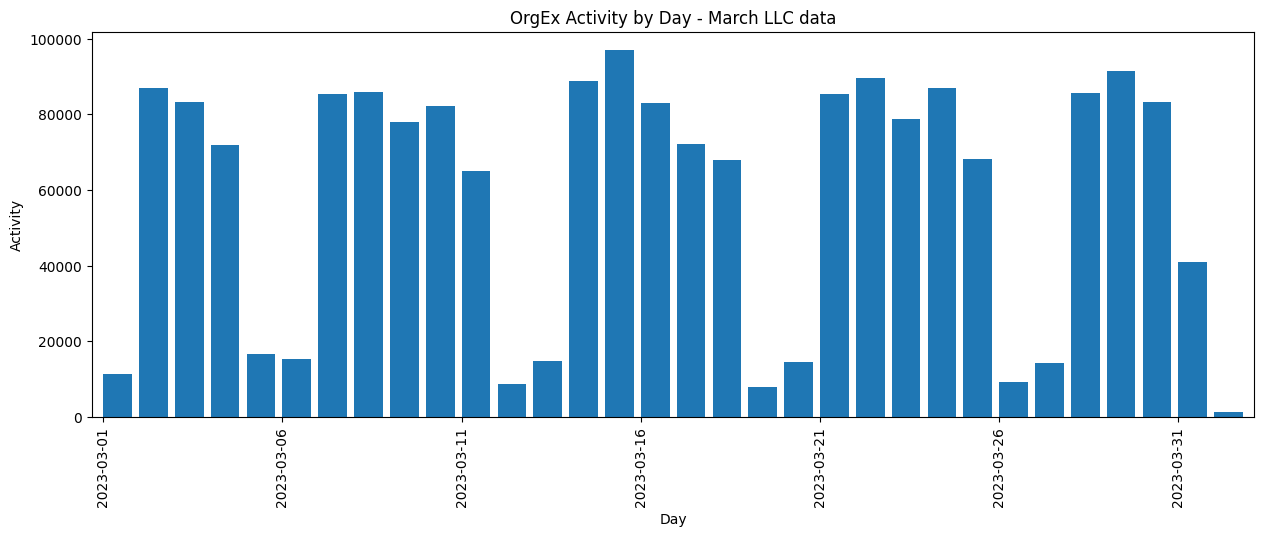

In [60]:
# Convert datetime strings to pandas datetimes
df['realtime'] = pd.to_datetime(df['realtime'])

# Group by day and count occurrences
day_counts = df.groupby(df['realtime'].dt.date)['realtime'].count()

# Set figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot bar chart with x-axis showing days
bar_width = 0.8
plt.bar(day_counts.index, day_counts.values, 
        width=bar_width, align='edge')
plt.title('OrgEx Activity by Day - March LLC data')
plt.xlabel('Day')
plt.ylabel('Activity')

# Set x-axis ticks for every day
ticks = pd.date_range(start=day_counts.index.min(), 
                      end=day_counts.index.max(), freq='5D')
plt.xticks(ticks=ticks, rotation=90)

# Add padding between bars
plt.margins(x=0.01)

plt.show()